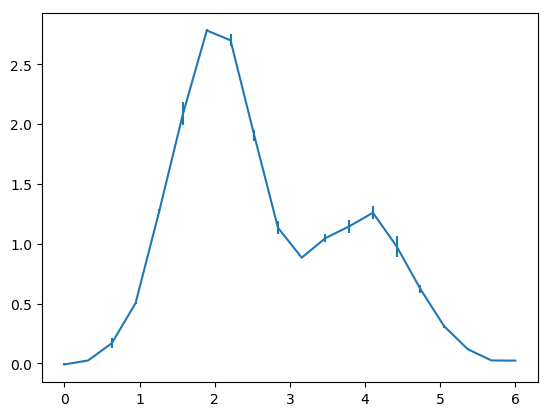

(PyObject <matplotlib.lines.Line2D object at 0x1a76b80f0>, (), (PyObject <matplotlib.collections.LineCollection object at 0x1a46d5320>,))

In [1]:
using PyCall
include("../src/gauss_error.jl")
include("../src/kernels.jl")

a = 0.
b = 6.
y = collect(range(a, stop=b, length=20))

f = [-0.00906047, 0.0239243, 0.168545, 0.503525, 1.27398,
    2.08793, 2.78204, 2.7, 1.90542, 1.13321,
    0.88324, 1.04642, 1.14465, 1.25853, 0.977623,
    0.621435, 0.310866, 0.117351, 0.0240617, 0.0226408]

delta_f = [0.00888777, 0.00480116, -0.0396684, -0.00968618, 0.0195524,
    -0.0988949, 0.00829277, 0.0494844, -0.0445353, 0.0556071,
    0.00347363, 0.0317405, 0.0539028, -0.0545216, 0.0870875,
    0.0338332, 0.0121158, -0.00790281, 0.00138139, -0.00662381]

using PyPlot
errorbar(y, f, yerr=delta_f)


In [2]:
function kernel(x::Real, y::Real)
    if abs(x-y) <= 1
        return 1. -  abs(x-y)
    end
    return 0.
end

kernel (generic function with 1 method)

In [3]:
basis = CubicSplineBasis(y, "dirichlet")
println()

┌ Info: Cubic spline basis is created.
└ @ Main /Users/ta_nyan/Documents/diploma/StatReg.jl/src/basis.jl:240


In [8]:
Omega = omega(basis, 2)
# matshow(Omega)
# colorbar()
model = GaussErrorUnfolder(basis, [Omega], "EmpiricalBayes", nothing, [1e-8], [10.], [0.3])#, "User", [0.005])
result = solve(model, kernel, f, delta_f, y)


┌ Info: GaussErrorMatrixUnfolder is created
└ @ Main /Users/ta_nyan/Documents/diploma/StatReg.jl/src/gauss_error.jl:65
┌ Info: GaussErrorUnfolder is created.
└ @ Main /Users/ta_nyan/Documents/diploma/StatReg.jl/src/gauss_error.jl:169
┌ Info: Starting solve...
└ @ Main /Users/ta_nyan/Documents/diploma/StatReg.jl/src/gauss_error.jl:202
┌ Info: Starting discretize kernel...
└ @ Main /Users/ta_nyan/Documents/diploma/StatReg.jl/src/basis.jl:45


Iter     Function value   Gradient norm 
     0    -1.186575e+03     1.832810e+02
     1    -1.193494e+03     1.583535e+01
     2    -1.256576e+03     1.156438e+01
     3    -1.262312e+03     2.886660e+00
     4    -1.272198e+03     5.796139e-01
     5    -1.272227e+03     1.684670e-01
     6    -1.272231e+03     2.228260e-03
     7    -1.272231e+03     4.360999e-08
     8    -1.272231e+03     2.907332e-08
     9    -1.272231e+03     3.391888e-08


┌ Info: Kernel was discretized successfully.
└ @ Main /Users/ta_nyan/Documents/diploma/StatReg.jl/src/basis.jl:56
┌ Info: Starting solve...
└ @ Main /Users/ta_nyan/Documents/diploma/StatReg.jl/src/gauss_error.jl:95
┌ Info: Starting find_optimal_alpha...
└ @ Main /Users/ta_nyan/Documents/diploma/StatReg.jl/src/check.jl:122
┌ Info: Starting optimization...
└ @ Main /Users/ta_nyan/Documents/diploma/StatReg.jl/src/check.jl:147
┌ Info: Optimized successfully, alphas = [0.0207639].
└ @ Main /Users/ta_nyan/Documents/diploma/StatReg.jl/src/check.jl:162
┌ Info: Ending solve...
└ @ Main /Users/ta_nyan/Documents/diploma/StatReg.jl/src/gauss_error.jl:113
┌ Info: Ending solve...
└ @ Main /Users/ta_nyan/Documents/diploma/StatReg.jl/src/gauss_error.jl:210


Dict{String,Array{Float64,N} where N} with 3 entries:
  "errors" => [0.190485 -0.165416 … -0.00157688 -0.00487096; -0.165416 0.297175…
  "alphas" => [0.0207639]
  "coeff"  => [0.261512, -0.0896132, -0.492193, 0.639689, 2.6155, 4.02724, 3.73…

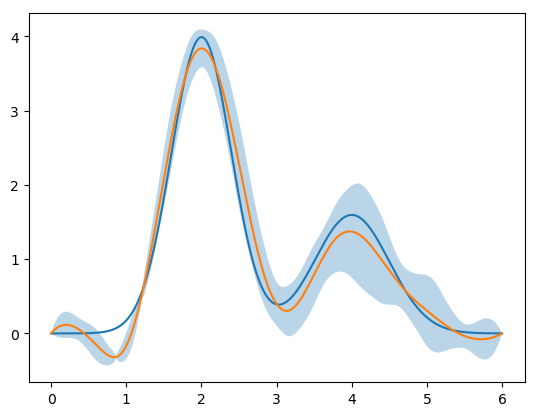

┌ Info: PhiVec is created.
└ @ Main /Users/ta_nyan/Documents/diploma/StatReg.jl/src/vector.jl:69


PyObject <matplotlib.collections.PolyCollection object at 0x1aa3b2588>

In [9]:
phivec = PhiVec(result, basis)
z = collect(range(a, stop=b, length=1000))
plot(z, real_phi.(z))
phi_reconstructed = phivec.phi_function.(z)
phi_reconstructed_errors = phivec.error_function.(z)
plot(z, phi_reconstructed)
fill_between(z, phi_reconstructed - phi_reconstructed_errors, phi_reconstructed + phi_reconstructed_errors, alpha=0.3)

In [6]:
function real_phi(x::Real)
    mu1 = 2.
    mu2 = 4.
    n1 = 4.
    n2 = 2.
    sig1 = 0.4
    sig2 = 0.5
    norm(n, mu, sig, x) = n / sqrt(2 * pi*sig^2) * exp(-(x - mu)^2 / (2 * sig^2))
    return norm(n1, mu1, sig1, x) + norm(n2, mu2, sig2, x)
end

real_phi (generic function with 1 method)